In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_com = pd.read_csv(r"C:\Users\hegde\Desktop\DS Ass Qst\Company_Data.csv") 

In [3]:
data_com.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# EDA process

In [4]:
data_com.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
data_com.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [6]:
data_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
data_com.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [8]:
data_com.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [9]:
data_com.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [10]:
data_com[data_com.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [11]:
data_com['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [12]:
data_com['Urban'].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [13]:
data_com['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [14]:
df = data_com.copy()

In [15]:
# feature engineer
def split(num):
    if num < 5:
        return 'Low'
    elif num >= 5 and num<10:
        return 'Medium'
    else:
        return 'High'
    
df['Sales'] = df['Sales'].apply(split)

In [16]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,138,73,11,276,120,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83,Good,65,10,Yes,Yes
2,High,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Medium,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No


In [17]:
df['Sales'].value_counts()

Medium    244
High       79
Low        77
Name: Sales, dtype: int64

# Data visualization

C:\Users\hegde\AppData\Local\Temp\ipykernel_1360\959258083.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)


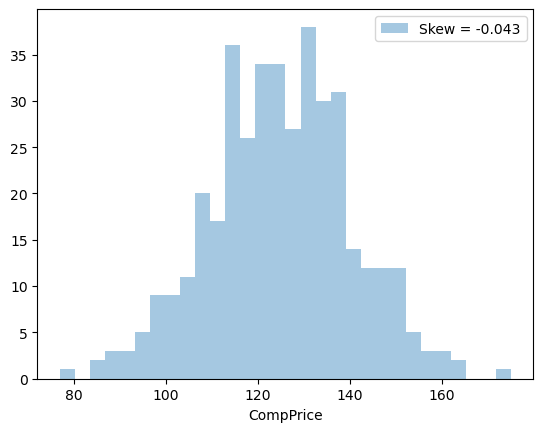

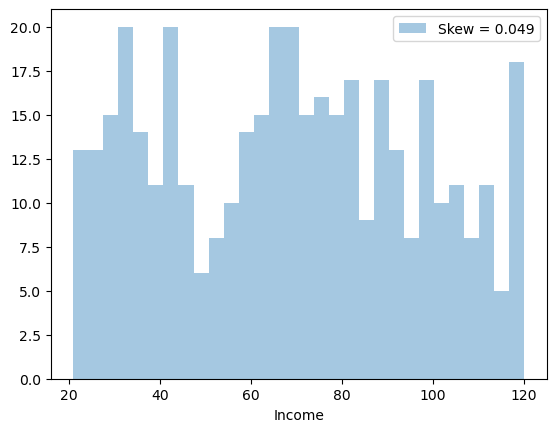

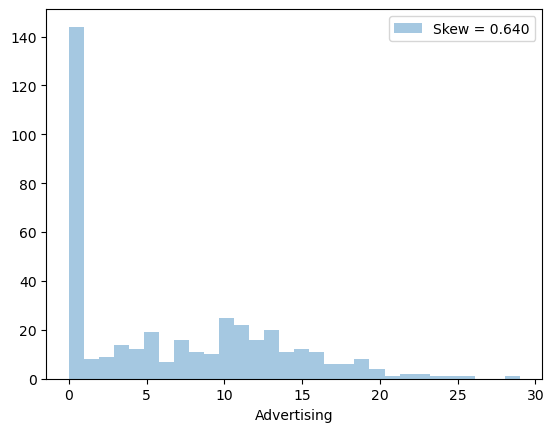

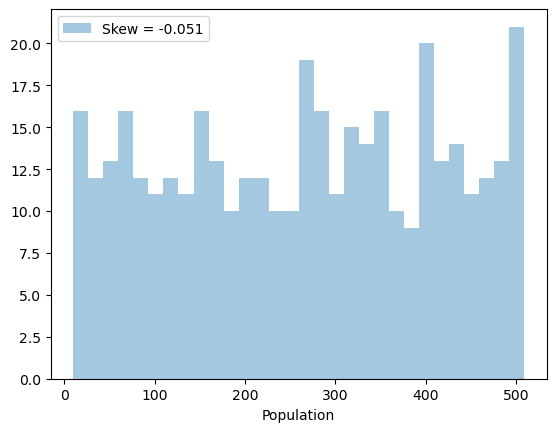

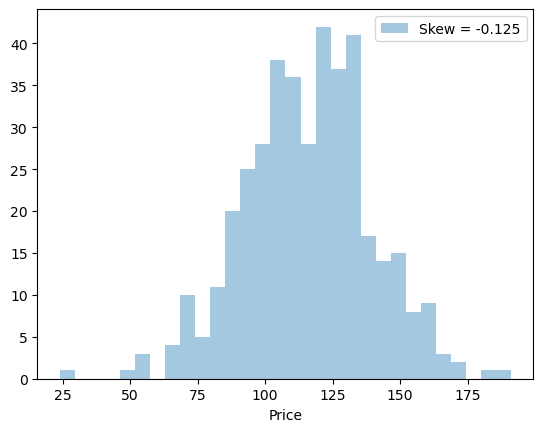

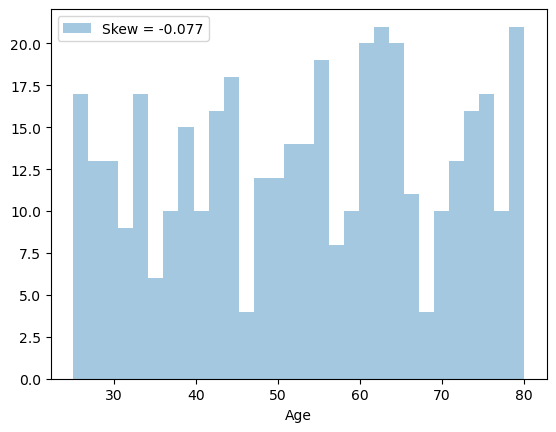

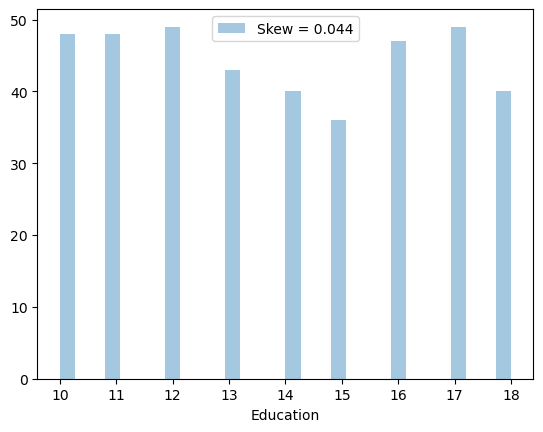

In [18]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
for feat in numerical_features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

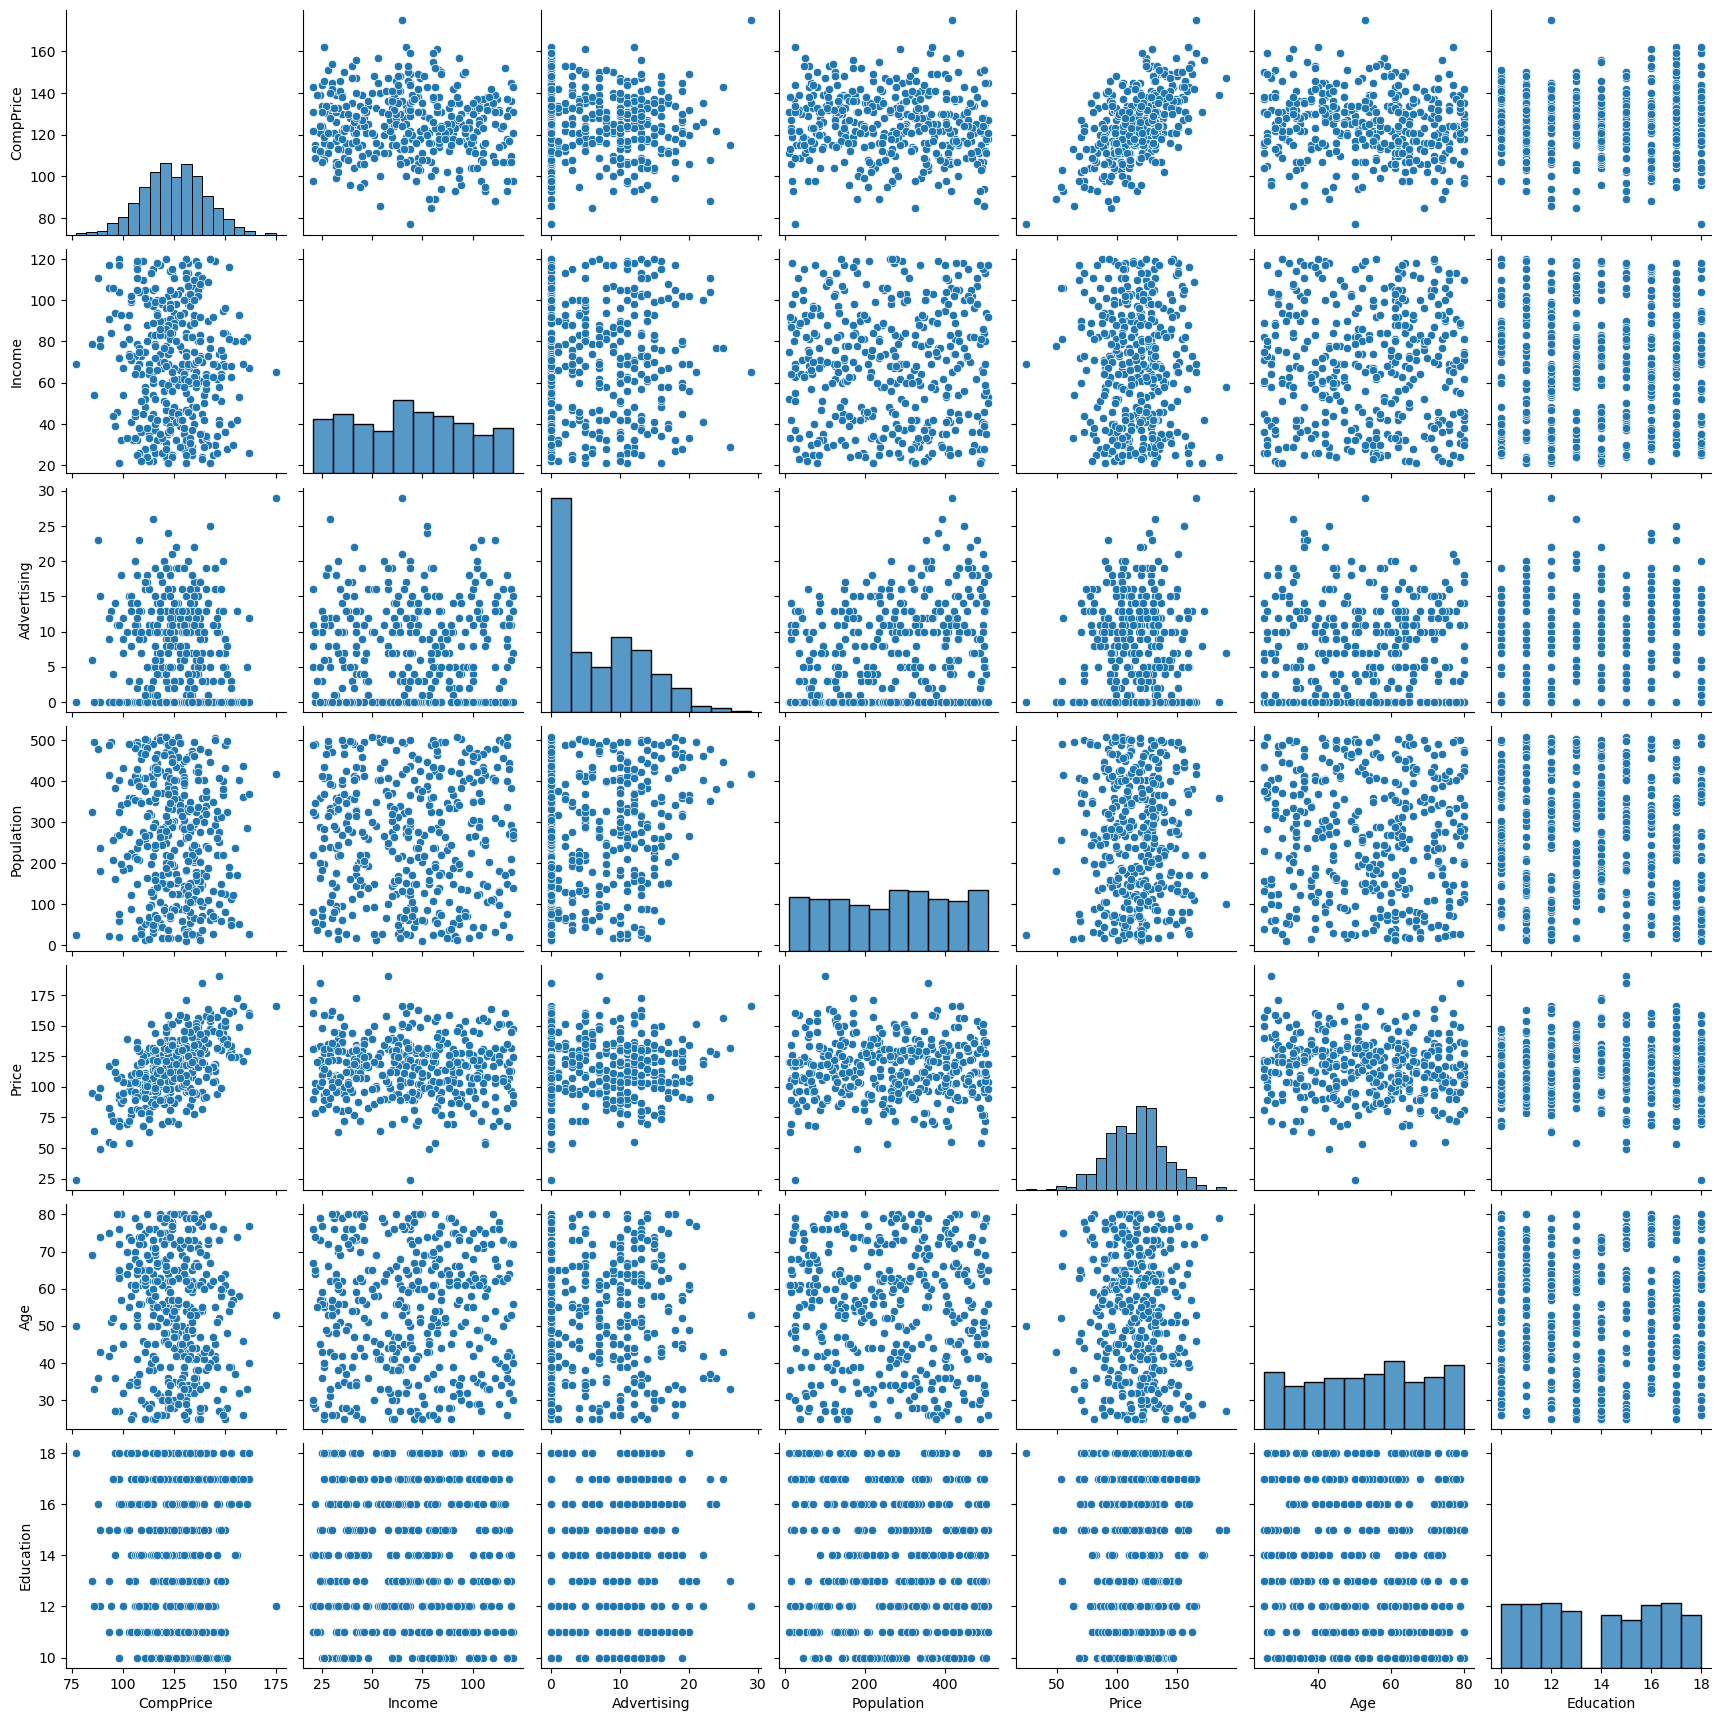

In [19]:
sns.pairplot(data = df)

C:\Users\hegde\AppData\Local\Temp\ipykernel_1360\1713592561.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')


<Axes: >

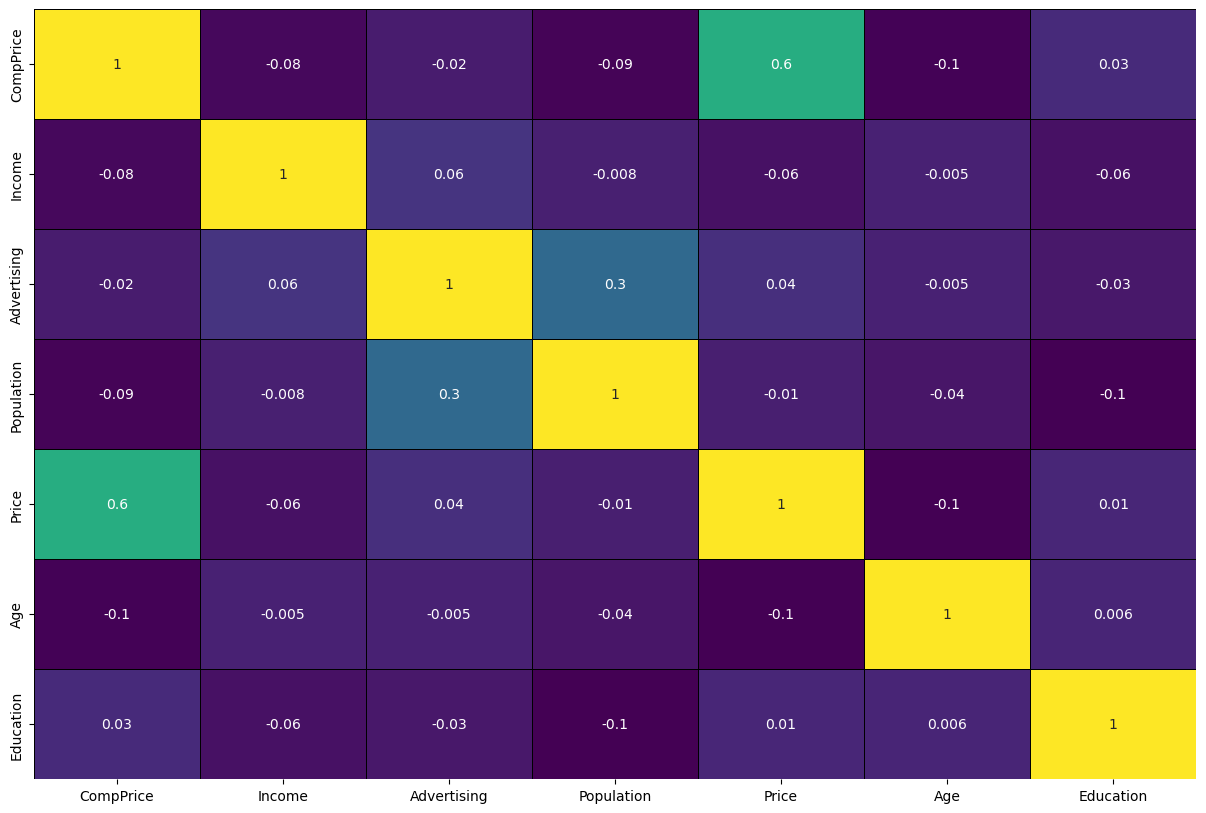

In [20]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')

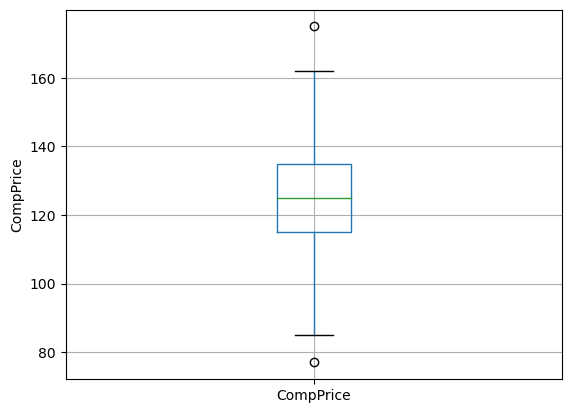

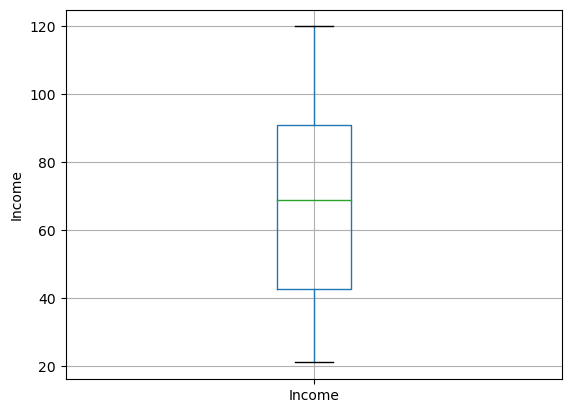

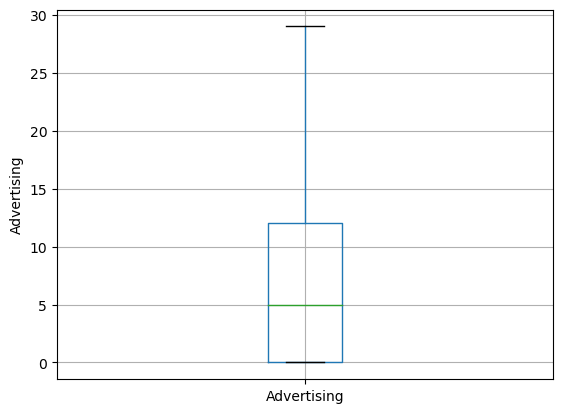

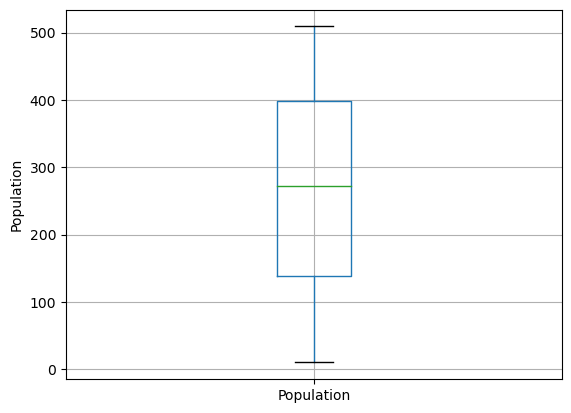

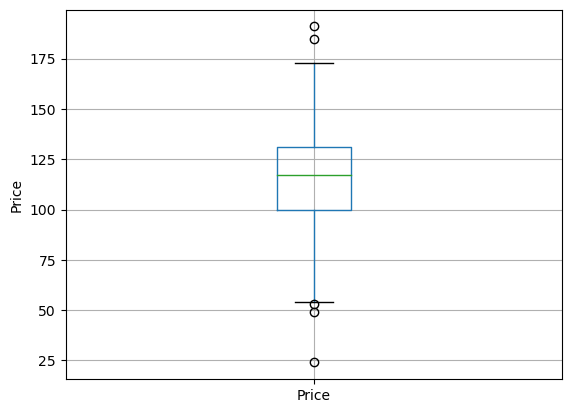

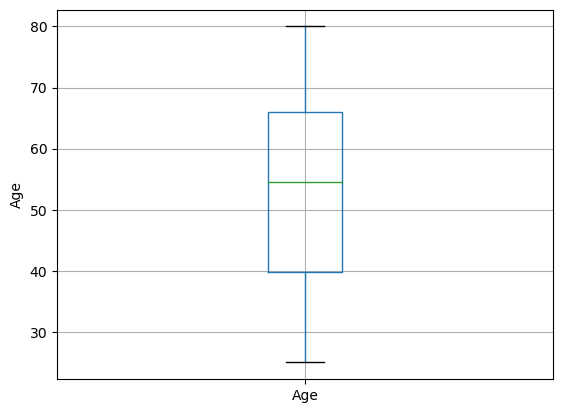

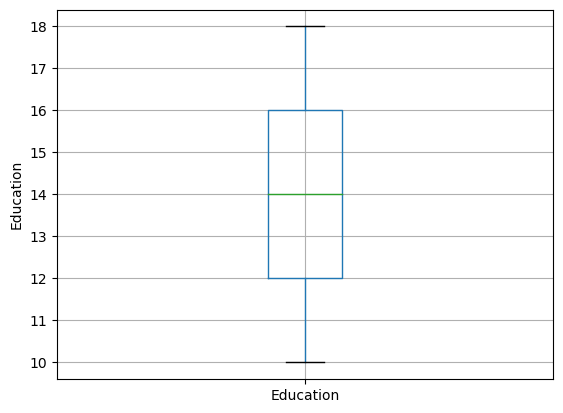

In [21]:
df_num = pd.concat([df.iloc[:, 1:6], df.iloc[:, [7, 8]]], axis = 'columns')
for feature in df_num:
    df_num = df_num.copy()
    df_num.boxplot(column = feature)
    plt.ylabel(feature)
    plt.show()

In [22]:
df_num.corr()

,CompPrice,Income,Advertising,Population,Price,Age,Education
CompPrice,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [23]:
# treating outliers
q1 = df['CompPrice'].quantile(0.25)
q3 = df['CompPrice'].quantile(0.75)
IQR = q3-q1

upper_bound = q3+(1.5*IQR)
lower_bound = q1-(1.5*IQR)
df[(df['CompPrice'] > upper_bound) | (df['CompPrice'] < lower_bound)]

df = df[(df['CompPrice'] < upper_bound) & (df['CompPrice'] > lower_bound)]
df = df.copy()
df.loc[(df['CompPrice'] > upper_bound), 'CompPrice'] = upper_bound
df.loc[(df['CompPrice'] < lower_bound), 'CompPrice'] = lower_bound


<Axes: >

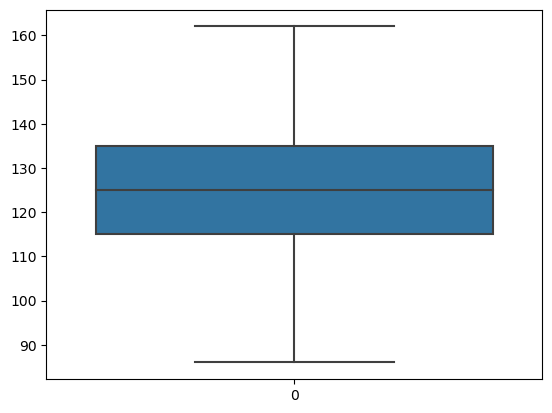

In [24]:
sns.boxplot(df['CompPrice'])

In [25]:
q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)
IQR = q3-q1

upper_bound = q3+(1.5*IQR)
lower_bound = q1-(1.5*IQR)
df[(df['Price'] > upper_bound) | (df['Price'] < lower_bound)]

df_num = df[(df['Price'] < upper_bound) & (df['Price'] > lower_bound)]
df_num = df.copy()
df_num.loc[(df_num['Price'] > upper_bound), 'Price'] = upper_bound
df_num.loc[(df_num['Price'] < lower_bound), 'Price'] = lower_bound


<Axes: >

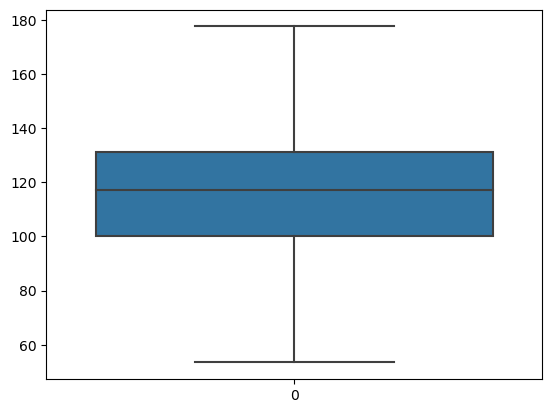

In [26]:
sns.boxplot(df_num['Price'])

In [27]:
df_num.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,138,73,11,276,120.0,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83.0,Good,65,10,Yes,Yes
2,High,113,35,10,269,80.0,Medium,59,12,Yes,Yes
3,Medium,117,100,4,466,97.0,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128.0,Bad,38,13,Yes,No


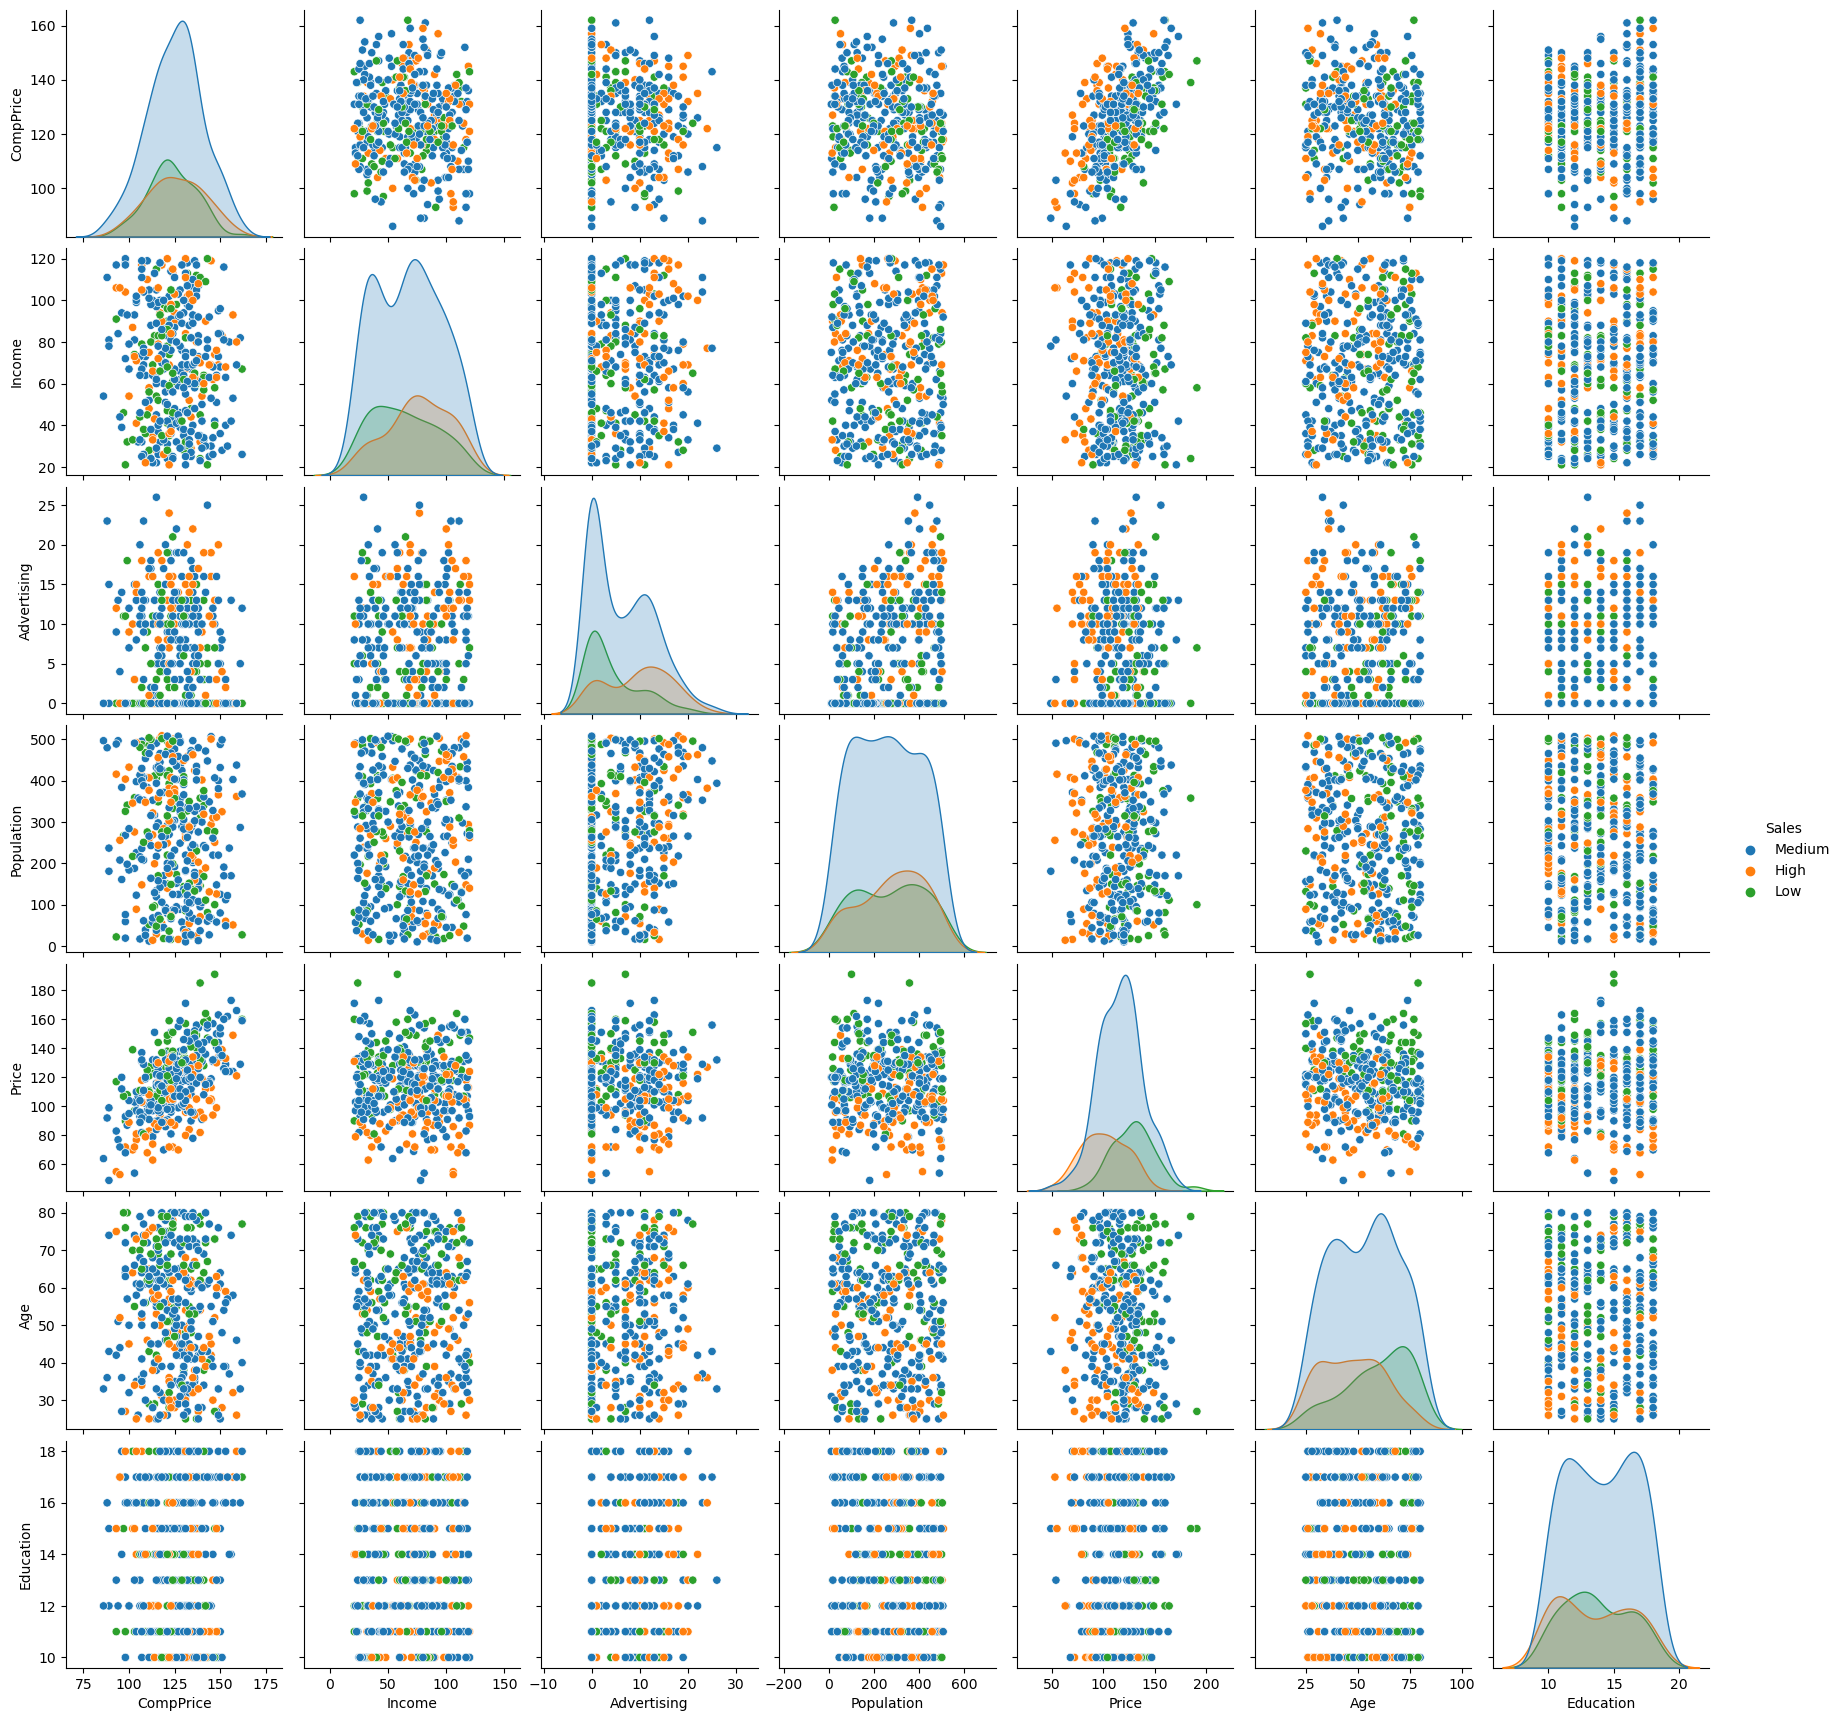

In [28]:
import seaborn as sns
sns.pairplot(data=df, hue = 'Sales')

In [29]:
df_num = pd.get_dummies(df_num.iloc[:,1:])

In [30]:
df_num['Sales'] = df['Sales']
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
df_num['Sales'] = l.fit_transform(df_num['Sales'])
df_num.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sales
0,138,73,11,276,120.0,42,17,1,0,0,0,1,0,1,2
1,111,48,16,260,83.0,65,10,0,1,0,0,1,0,1,0
2,113,35,10,269,80.0,59,12,0,0,1,0,1,0,1,0
3,117,100,4,466,97.0,55,14,0,0,1,0,1,0,1,2
4,141,64,3,340,128.0,38,13,1,0,0,0,1,1,0,1


In [31]:
df_num.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sales
0,138,73,11,276,120.0,42,17,1,0,0,0,1,0,1,2
1,111,48,16,260,83.0,65,10,0,1,0,0,1,0,1,0
2,113,35,10,269,80.0,59,12,0,0,1,0,1,0,1,0
3,117,100,4,466,97.0,55,14,0,0,1,0,1,0,1,2
4,141,64,3,340,128.0,38,13,1,0,0,0,1,1,0,1


# Randomforest 

In [32]:
X = df_num.iloc[:, :-1]
y =  df_num.Sales

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [34]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

model = RandomForestClassifier(n_estimators=100, max_features=3)
model.fit(X_train, y_train)

RandomForestClassifier(max_features=3)

In [35]:
y_pred = model.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

0.6583333333333333

# model validation using KFold

In [37]:
X = df_num.iloc[:,:-1]
y = df_num.Sales

In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [39]:
kfold = KFold(n_splits=10, random_state = 0, shuffle=True)
model1 = RandomForestClassifier(n_estimators=100, max_depth=3)
clf = DecisionTreeClassifier()
result = cross_val_score(model1, X, y, cv = kfold)
print(result.mean())

0.6471153846153846


# model validation using loocv

In [40]:
X = df_num.iloc[:,:-1]
y = df_num.Sales

In [41]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import LeaveOneOut

In [42]:
loocv = LeaveOneOut()
model2 = RandomForestClassifier(n_estimators=100, max_depth=3)
clf = DecisionTreeClassifier()
result1 = cross_val_score(model2, X, y, cv = loocv)
print(result1.mean())

0.654911838790932
